In [1]:
genre_mapping = {
    "드라마": 1 << 43,
    "첩보": 1 << 42,
    "옴니버스": 1 << 41,
    "뮤직": 1 << 40,
    "동성애": 1 << 39,
    "로드무비": 1 << 38,
    "아동": 1 << 37,
    "하이틴(고교)": 1 << 36,
    "전기": 1 << 35,
    "청춘영화": 1 << 34,
    "재난": 1 << 33,
    "문예": 1 << 32,
    "연쇄극": 1 << 31,
    "신파": 1 << 30,
    "활극": 1 << 29,
    "반공/분단": 1 << 28,
    "군사": 1 << 27,
    "계몽": 1 << 26,
    "사회물(경향)": 1 << 25,
    "스포츠": 1 << 24,
    "합작(번안물)": 1 << 23,
    "종교": 1 << 22,
    "무협": 1 << 21,
    "미스터리": 1 << 20,
    "SF": 1 << 19,
    "코메디": 1 << 18,
    "느와르": 1 << 17,
    "액션": 1 << 16,
    "범죄": 1 << 15,
    "어드벤처": 1 << 14,
    "가족": 1 << 13,
    "에로": 1 << 12,
    "멜로/로맨스": 1 << 11,
    '멜로드라마': 1 << 11,
    "공포": 1 << 10,
    "뮤지컬": 1 << 9,
    "시대극/사극": 1 << 8,
    '실험': 1 << 7,
    '스릴러': 1 << 5,
    '서부': 1 << 4,
    '전쟁': 1 << 3,
    '갱스터': 1 << 2,
    '판타지': 1 << 1,
    '해양액션': 1 << 0
}

def titleList(fileName : str):
    
    movieNum = int(fileName.split('_')[1].split('.')[0]) #int(movie)
    titleListGenre = []
    for k, v in genre_mapping.items():
        titleListGenre.append(1 if v & movieNum else 0)
        
    return titleListGenre

titleList('자마_8796093022208.jpg')

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [2]:
import numpy as np
from sklearn.decomposition import PCA

# 주어진 genre_mapping
genre_mapping = {
    "드라마": 1 << 43, "첩보": 1 << 42, "옴니버스": 1 << 41, "뮤직": 1 << 40,
    "동성애": 1 << 39, "로드무비": 1 << 38, "아동": 1 << 37, "하이틴(고교)": 1 << 36,
    "전기": 1 << 35, "청춘영화": 1 << 34, "재난": 1 << 33, "문예": 1 << 32,
    "연쇄극": 1 << 31, "신파": 1 << 30, "활극": 1 << 29, "반공/분단": 1 << 28,
    "군사": 1 << 27, "계몽": 1 << 26, "사회물(경향)": 1 << 25, "스포츠": 1 << 24,
    "합작(번안물)": 1 << 23, "종교": 1 << 22, "무협": 1 << 21, "미스터리": 1 << 20,
    "SF": 1 << 19, "코메디": 1 << 18, "느와르": 1 << 17, "액션": 1 << 16,
    "범죄": 1 << 15, "어드벤처": 1 << 14, "가족": 1 << 13, "에로": 1 << 12,
    "멜로/로맨스": 1 << 11, '멜로드라마': 1 << 11, "공포": 1 << 10, "뮤지컬": 1 << 9,
    "시대극/사극": 1 << 8, '실험': 1 << 7, '스릴러': 1 << 5, '서부': 1 << 4,
    '전쟁': 1 << 3, '갱스터': 1 << 2, '판타지': 1 << 1, '해양액션': 1 << 0
}

# 제목 파일로부터 이진 벡터 생성
def titleList(fileName: str):
    movieNum = int(fileName.split('_')[1].split('.')[0])  # int(movie)
    titleListGenre = []
    for k, v in genre_mapping.items():
        titleListGenre.append(1 if v & movieNum else 0)
    return titleListGenre

# 예시 파일명으로 장르 벡터 생성
genre_vector = titleList('자마_8796093022208.jpg')
genre_vector = np.array(genre_vector).reshape(1, -1)  # 2D 배열로 변환 (1 x 43)
print("원래 차원의 벡터: ", genre_vector.shape)

# PCA 차원 축소
# pca = PCA(n_components=8)
pca = PCA(n_components=min(genre_vector.shape[1], 1))
genre_vector_pca = pca.fit_transform(genre_vector)

print("원래 차원의 벡터: ", genre_vector.shape)
print("차원 축소된 벡터: ", genre_vector_pca.shape)
print(genre_vector_pca)

# 네, (1, 44)의 원래 차원을 가지고 있는 경우,
# 차원을 10개로 줄이기엔 충분하지 않습니다.
# PCA는 입력 데이터의 샘플 수(n_samples)보다 더 많은 차원(n_components)을 가질 수 없기 때문입니다.
# 즉, 차원을 10개로 줄이기 위해서는 샘플 수가 10개 이상이어야 합니다.
# 현재 (1, 44)에서 샘플 수는 1개이고 피처 수는 44개입니다.
# 이 경우, 차원 수는 최소 1로만 줄일 수 있으며, 차원을 10개로 줄이려면 샘플 수를 늘려야 합니다.

원래 차원의 벡터:  (1, 44)
원래 차원의 벡터:  (1, 44)
차원 축소된 벡터:  (1, 1)
[[0.]]


C:\Users\acy\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_pca.py:499: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


In [3]:
import os
from collections import Counter

# genre_mapping은 기존에 제공된 딕셔너리와 동일
genre_mapping = {
    "드라마": 1 << 43, "첩보": 1 << 42, "옴니버스": 1 << 41, "뮤직": 1 << 40,
    "동성애": 1 << 39, "로드무비": 1 << 38, "아동": 1 << 37, "하이틴(고교)": 1 << 36,
    "전기": 1 << 35, "청춘영화": 1 << 34, "재난": 1 << 33, "문예": 1 << 32,
    "연쇄극": 1 << 31, "신파": 1 << 30, "활극": 1 << 29, "반공/분단": 1 << 28,
    "군사": 1 << 27, "계몽": 1 << 26, "사회물(경향)": 1 << 25, "스포츠": 1 << 24,
    "합작(번안물)": 1 << 23, "종교": 1 << 22, "무협": 1 << 21, "미스터리": 1 << 20,
    "SF": 1 << 19, "코메디": 1 << 18, "느와르": 1 << 17, "액션": 1 << 16,
    "범죄": 1 << 15, "어드벤처": 1 << 14, "가족": 1 << 13, "에로": 1 << 12,
    "멜로/로맨스": 1 << 11, "멜로드라마": 1 << 11, "공포": 1 << 10, "뮤지컬": 1 << 9,
    "시대극/사극": 1 << 8, "실험": 1 << 7, "스릴러": 1 << 5, "서부": 1 << 4,
    "전쟁": 1 << 3, "갱스터": 1 << 2, "판타지": 1 << 1, "해양액션": 1 << 0
}

# 장르 빈도수를 저장하기 위한 Counter
genre_counter = Counter()

# 파일명이 저장된 폴더 경로
image_folder = r'G:\내 드라이브\project_poster\x_train'

# 장르별 빈도수를 계산하는 함수
def count_genres_from_files(image_folder):
    # 폴더 내 파일을 순회하며
    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg'):
            # 각 파일명에서 비트 플래그 추출
            movieNum = int(filename.split('_')[1].split('.')[0])
            
            # genre_mapping을 활용하여 장르 빈도수 카운트
            for genre, bitmask in genre_mapping.items():
                if movieNum & bitmask:
                    genre_counter[genre] += 1

# 장르 빈도수 세기 실행
count_genres_from_files(image_folder)

# 결과 출력
print("장르별 빈도수:")
for genre, count in sorted(genre_counter.items(),
                           key=lambda x:x[1],
                           reverse=True):
    print(f"\"{genre}\": {count},")

장르별 빈도수:
"드라마": 3098,
"스릴러": 761,
"액션": 682,
"멜로/로맨스": 663,
"멜로드라마": 663,
"범죄": 353,
"판타지": 347,
"미스터리": 336,
"공포": 311,
"어드벤처": 298,
"가족": 280,
"SF": 237,
"에로": 203,
"전쟁": 89,
"시대극/사극": 83,
"옴니버스": 69,
"뮤직": 59,
"아동": 56,
"느와르": 45,
"뮤지컬": 42,
"청춘영화": 39,
"스포츠": 36,
"동성애": 28,
"전기": 20,
"하이틴(고교)": 19,
"로드무비": 19,
"무협": 16,
"실험": 15,
"사회물(경향)": 14,
"재난": 11,
"종교": 10,
"서부": 6,
"반공/분단": 4,
"첩보": 3,
"갱스터": 3,
"활극": 2,
"해양액션": 1,
"군사": 1,
"문예": 1,
"신파": 1,


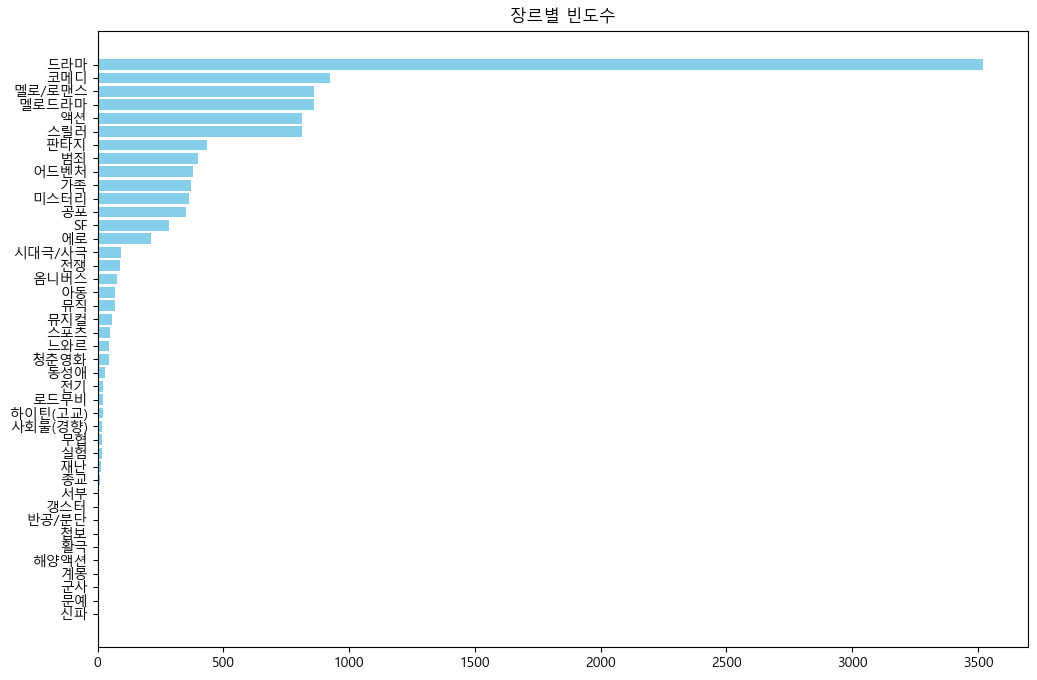

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 장르별 빈도수
genre_counts = {
"드라마": 3521,
"코메디": 923,
"멜로/로맨스": 862,
"멜로드라마": 862,
"액션": 812,
"스릴러": 811,
"판타지": 435,
"범죄": 399,
"어드벤처": 378,
"가족": 372,
"미스터리": 364,
"공포": 352,
"SF": 284,
"에로": 212,
"시대극/사극": 92,
"전쟁": 90,
"옴니버스": 79,
"아동": 71,
"뮤직": 68,
"뮤지컬": 58,
"스포츠": 48,
"느와르": 46,
"청춘영화": 44,
"동성애": 30,
"전기": 22,
"로드무비": 22,
"하이틴(고교)": 21,
"사회물(경향)": 17,
"무협": 17,
"실험": 16,
"재난": 13,
"종교": 11,
"서부": 7,
"갱스터": 5,
"반공/분단": 5,
"첩보": 4,
"활극": 3,
"해양액션": 1,
"계몽": 1,
"군사": 1,
"문예": 1,
"신파": 1
}

# C:\Windows\Fonts
font_path = r'C:\ex\prj_poster\MALGUN.TTF'
font_name = fm.FontProperties(fname=font_path).get_name()

# 장르와 빈도수 리스트로 변환
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# 막대그래프 생성
plt.figure(figsize=(12, 8))
plt.rc('font', family=font_name)
plt.barh(genres, counts, color='skyblue')
# plt.xlabel('빈도수')
# plt.ylabel('장르')
plt.title('장르별 빈도수')
plt.gca().invert_yaxis()  # y축 역전
plt.show()

# 모델이 그 장르에 과적합(overfitting)되거나 다른 장르를 무시하는 편향이 생길 수 있습니다.

In [5]:
# # 장르 통합 매핑
# resized_genre_mapping = {
#     "드라마": ["드라마", "청춘영화", "아동", "사회물(경향)",'가족', '하이틴(고교)','로드무비'],
#     "코메디": ["코메디"],
#     '로맨스': ['멜로/로맨스', '멜로드라마', '에로','동성애'],
#     "액션": ["액션", "재난", "범죄", "느와르",
#            '활극','첩보','해양액션', "서부", "갱스터", '무협'],
#     "SF/판타지": ["SF", "판타지", "어드벤처"],
#     "공포": ["공포", "스릴러", "미스터리"],
#     "전쟁": ["전쟁", "군사",'반공/분단'],
#     "뮤직": ["뮤지컬", "뮤직"],
#     '시대극': ['시대극/사극','전기'],
#     "기타": ["옴니버스", "종교", "실험",'스포츠', '계몽', '문예', '신파']
# }

# # 새로운 장르 빈도수 계산
# new_genre_counter = {key: 0 for key in genre_mapping.keys()}

# for new_genre, old_genres in genre_mapping.items():
#     for old_genre in old_genres:
#         if old_genre in genre_counter:
#             new_genre_counter[new_genre] += genre_counter[old_genre]

# # 결과 출력
# print("통합된 장르별 빈도수:")
# for genre, count in new_genre_counter.items():
#     print(f"{genre}: {count}")

In [6]:
# 여기부터 통합 장르 편집

In [7]:
resized_genre_mapping = {
    "드라마": ["드라마", "청춘영화", "사회물(경향)",'가족', '하이틴(고교)'],
    "코메디": ["코메디"],
    '로맨스': ['멜로/로맨스', '멜로드라마', '에로','동성애'],
    "액션": ["액션", "재난", "범죄", "느와르",
           '활극','첩보','해양액션', "서부", "갱스터", '무협',
           "전쟁", "군사",'반공/분단'],
    "SF/판타지": ["SF", "판타지", "어드벤처"],
    "공포": ["공포", "스릴러", "미스터리"],
    "기타": ["옴니버스", "종교", "실험",'스포츠', '계몽', '문예', '신파', "뮤지컬",
           "뮤직",'시대극/사극','전기', "아동",'로드무비']
}

list1=[]

for k, v in resized_genre_mapping.items():
    for i in v:
        # print(i)
        list1.append(i)
        
print(len(list1))

42


In [8]:
# 묶음 장르 빈도수 계산
final_counts = {}

# 각 묶음 장르에 대한 최종 빈도수 계산
for group, genres in resized_genre_mapping.items():
    total_count = sum(genre_counts.get(genre, 0) for genre in genres)  # 해당 장르의 빈도수를 합산
    final_counts[group] = total_count

# 최종 결과 출력
print("묶음 장르 총합 빈도수:")
for group, count in sorted(final_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"\"{group}\": {count},")

묶음 장르 총합 빈도수:
"드라마": 3975,
"로맨스": 1966,
"공포": 1527,
"액션": 1403,
"SF/판타지": 1097,
"코메디": 923,
"기타": 490,


In [9]:
final_counts

{'드라마': 3975,
 '코메디': 923,
 '로맨스': 1966,
 '액션': 1403,
 'SF/판타지': 1097,
 '공포': 1527,
 '기타': 490}

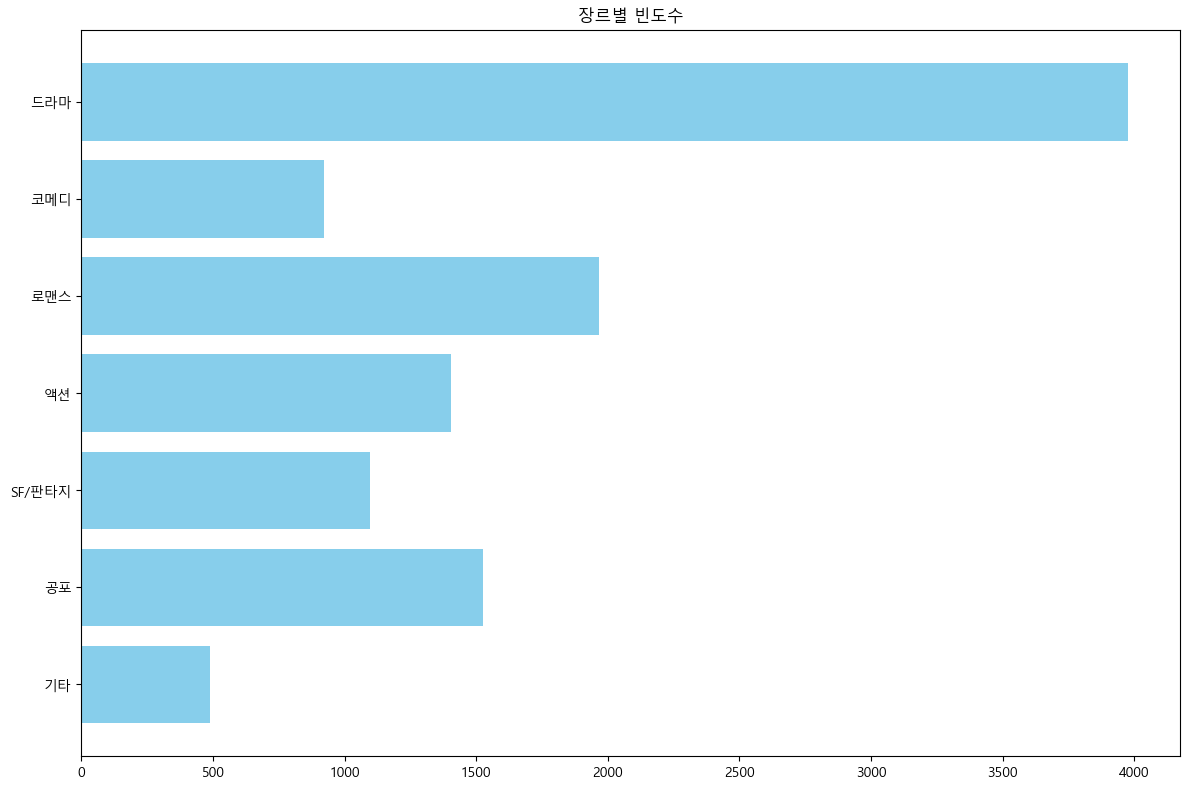

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
font_path = r'C:\ex\prj_poster\MALGUN.TTF'  # 사용자 정의 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()

# 장르와 빈도수 리스트로 변환
genres2 = list(final_counts.keys())
counts2 = list(final_counts.values())

# 막대그래프 생성
plt.figure(figsize=(12, 8))  # 그래프 크기 설정
plt.rc('font', family=font_name)  # 사용자 정의 폰트 적용
plt.barh(genres2, counts2, color='skyblue')  # 수평 막대 그래프

# 라벨 및 제목 설정
# plt.xlabel('빈도수')
# plt.ylabel('장르')
plt.title('장르별 빈도수')
plt.gca().invert_yaxis()  # y축 역전
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()  # 그래프 출력

In [11]:
# 특정 장르의 이미지 데이터 증강이 목표
# 일단 코메디만 빼낸다

In [12]:
import os
import shutil

# 폴더 경로 설정
source_folder = r'G:\내 드라이브\project_poster\x_train' 
# 이미지 파일이 있는 폴더
destination_folder = r'G:\내 드라이브\project_poster\comedy'
# 코미디 장르 이미지를 옮길 폴더

# 만약 대상 폴더가 없으면 새로 생성
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# 코미디 장르 비트 (예시: 코미디가 3번째 비트에 해당된다고 가정)
# "코메디": 1 << 18
COMEDY_BIT_MASK = 1 << 18  # 3번째 비트를 확인

# 파일명을 읽어 코미디 장르를 포함하는 파일만 필터링
for filename in os.listdir(source_folder):
    if filename.endswith('.jpg'):
        try:
            # 파일명에서 장르 코드를 추출
            title, genre_code_str = filename.split('_')
            genre_code = int(genre_code_str.split('.')[0])  # 확장자 제거하고 장르 코드만 추출

            # 코미디 장르 비트가 켜져 있는지 확인
            if genre_code & COMEDY_BIT_MASK:
                # 코미디 장르가 포함된 파일일 경우 대상 폴더로 이동
                source_file_path = os.path.join(source_folder, filename)
                destination_file_path = os.path.join(destination_folder, filename)
                
                # 파일 이동
                shutil.move(source_file_path, destination_file_path)
                print(f'Moved: {filename}')
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
import random

# 이미지 폴더 경로
input_folder = r'G:\내 드라이브\project_poster\comedy'  # 원본 이미지가 저장된 폴더
output_folder = r'G:\내 드라이브\project_poster\comedy_augmented'  # 증강된 이미지를 저장할 폴더
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 이미지 데이터 생성기 설정
datagen = ImageDataGenerator(
    rotation_range=40,          # 0~40도 회전
    width_shift_range=0.2,      # 20% 수평 이동
    height_shift_range=0.2,     # 20% 수직 이동
    shear_range=0.2,            # 전단 변형
    zoom_range=0.2,             # 20% 확대/축소
    horizontal_flip=True,        # 좌우 반전
    fill_mode='nearest'         # 새로 생성된 픽셀을 채우는 방법
)

# 사용하고자 하는 증강 방법 리스트
augmentation_methods = [
    "rotation",
    "width_shift",
    "height_shift",
    "shear",
    "zoom",
    "horizontal_flip",
    "add_noise",  # 노이즈 추가
    "crop",        # 크롭
    "scaling",     # 스케일링
]

# 폴더 내 이미지 파일을 불러와서 데이터 증강 적용
for filename in os.listdir(input_folder):
    img_path = os.path.join(input_folder, filename)
    img = load_img(img_path)  # 이미지 불러오기
    x = img_to_array(img)      # 이미지를 배열로 변환
    x = np.expand_dims(x, axis=0)  # 차원 확장

    # 랜덤으로 증강 방법 선택
    method = random.choice(augmentation_methods)

    if method == "rotation":
        for i, batch in enumerate(datagen.flow(x, batch_size=1)):
            save_img(os.path.join(output_folder, f'rotation!{i}!{filename}'), batch[0])
            if i >= 1:  # 각 방법당 1개만 생성
                break

    elif method == "width_shift":
        for i, batch in enumerate(datagen.flow(x, batch_size=1)):
            save_img(os.path.join(output_folder, f'widthshift!{i}!{filename}'), batch[0])
            if i >= 1:
                break

    elif method == "height_shift":
        for i, batch in enumerate(datagen.flow(x, batch_size=1)):
            save_img(os.path.join(output_folder, f'heightshift!{i}!{filename}'), batch[0])
            if i >= 1:
                break

    elif method == "shear":
        for i, batch in enumerate(datagen.flow(x, batch_size=1)):
            save_img(os.path.join(output_folder, f'shear!{i}!{filename}'), batch[0])
            if i >= 1:
                break

    elif method == "zoom":
        for i, batch in enumerate(datagen.flow(x, batch_size=1)):
            save_img(os.path.join(output_folder, f'zoom!{i}!{filename}'), batch[0])
            if i >= 1:
                break

    elif method == "horizontal_flip":
        for i, batch in enumerate(datagen.flow(x, batch_size=1)):
            save_img(os.path.join(output_folder, f'horizontalflip!{i}!{filename}'), batch[0])
            if i >= 1:
                break

    elif method == "add_noise":
        noise = np.random.normal(0, 0.1, x[0].shape)  # 노이즈 추가
        noisy_image = x[0] + noise
        noisy_image = np.clip(noisy_image, 0, 255).astype('uint8')
        save_img(os.path.join(output_folder, f'addnoise!{i}!{filename}'), noisy_image)

    elif method == "crop":
        # 랜덤 크롭 (예: 중앙 부분 70%)
        h, w, _ = x[0].shape
        crop_h, crop_w = int(h * 0.7), int(w * 0.5)
        x_center, y_center = h // 2, w // 2
        cropped_image = x[0][x_center - crop_h // 2: x_center + crop_h // 2,
                             y_center - crop_w // 2: y_center + crop_w // 2]
        save_img(os.path.join(output_folder, f'crop!{i}!{filename}'), cropped_image)

    elif method == "scaling":
        scaling_factor = random.uniform(0.5, 1.5)  # 랜덤 스케일
        scaled_image = np.clip(x[0] * scaling_factor, 0, 255).astype('uint8')
        save_img(os.path.join(output_folder, f'scaling!{i}!{filename}'), scaled_image)

print("이미지 증강 완료!")


이미지 증강 완료!
